In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
df = pd.read_csv('insurance.csv')

In [3]:
#INFO ABOUT DATASET

print(df.head())
print(df.info())
print(df.describe())


   index  PatientID   age gender   bmi  bloodpressure diabetic  children  \
0      0          1  39.0   male  23.2             91      Yes         0   
1      1          2  24.0   male  30.1             87       No         0   
2      2          3   NaN   male  33.3             82      Yes         0   
3      3          4   NaN   male  33.7             80       No         0   
4      4          5   NaN   male  34.1            100       No         0   

  smoker     region    claim  
0     No  southeast  1121.87  
1     No  southeast  1131.51  
2     No  southeast  1135.94  
3     No  northwest  1136.40  
4     No  northwest  1137.01  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-n

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
1
age          37
sex           2
bmi         403
children      6
smoker        1
region        4
charges     711
dtype: int64


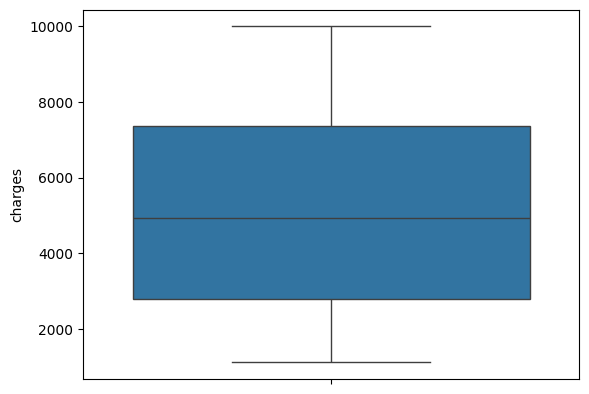

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
   age  sex    bmi  children  smoker  region    charges
1   18    1  33.77         1       0       2  1725.5523
2   28    1  33.00         3       0       2  4449.4620
4   32    1  28.88         0       0       1  3866.8552
5   31    0  25.74         0       0       2  3756.6216
6   46    0  33.44         1       0       2  8240.5896
<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       712 non-null    int64  
 1   sex       712 non-null    int64  
 2   bmi       712 non-null    float64
 3   children  712 non-null    int64  
 4   smoker    712 non-null    int64  
 5   region    712 non-null    int64  
 6   charges   712 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.5 KB
None
              age         sex         bmi    c

In [41]:
# DATA CLEANING 

#Checking for missing values
print(df.isnull().sum())

#Checking for duplicates
print(df.duplicated().sum())

#Checking for unique values
print(df.nunique())

#Checking for outliers
sns.boxplot(df['charges'])
plt.show()

#Removing outliers
df = df[df['charges'] < 10000]

#handle missing values
df['age'] = df['age'].fillna(df['age'].mean())
df['region'] = df['region'].fillna(df['region'].mode()[0])
#check missing values
print(df.isnull().sum())

#check data after cleaning
print(df.head())
print(df.info())
print(df.describe())

# One-hot encoding for categorical variables
categorical_features = ['sex',  'smoker', 'region']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [63]:
# Drop the one-hot encoded region columns if they exist
columns_to_drop = ['region_northwest', 'region_southeast', 'region_southwest']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Verify the features
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


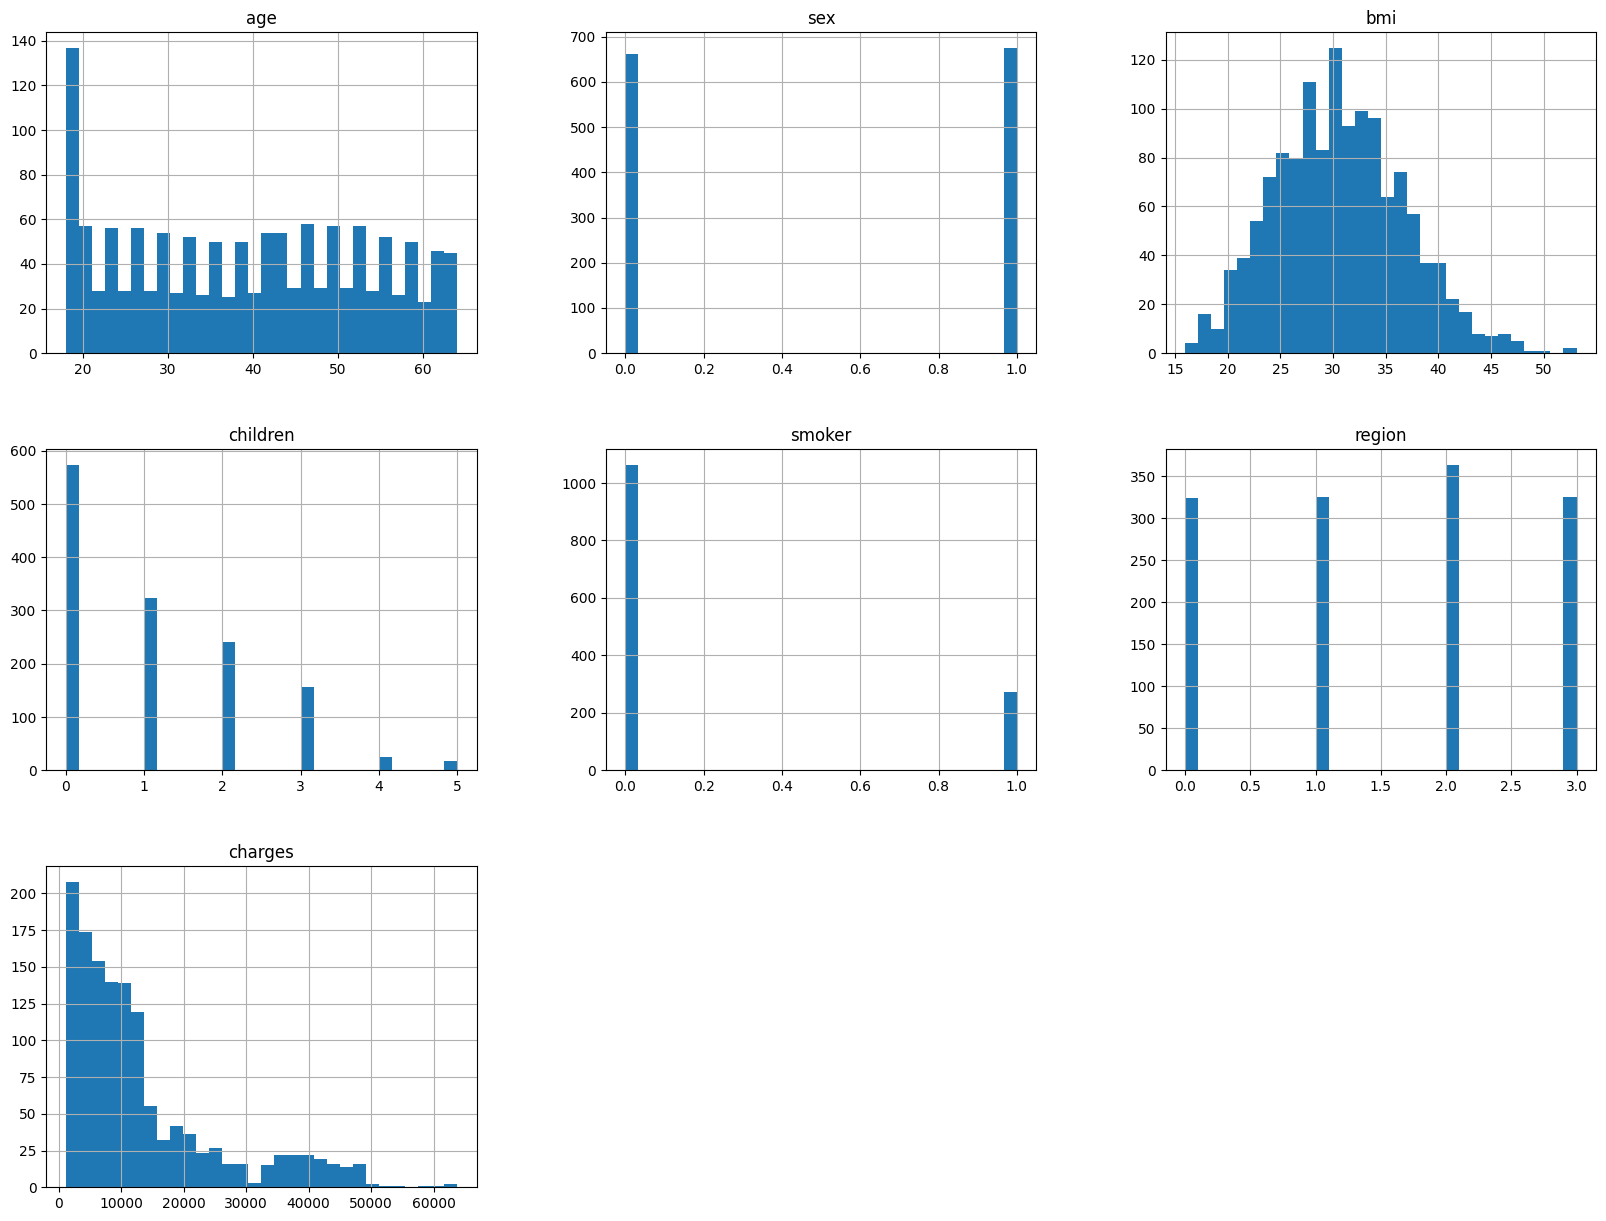

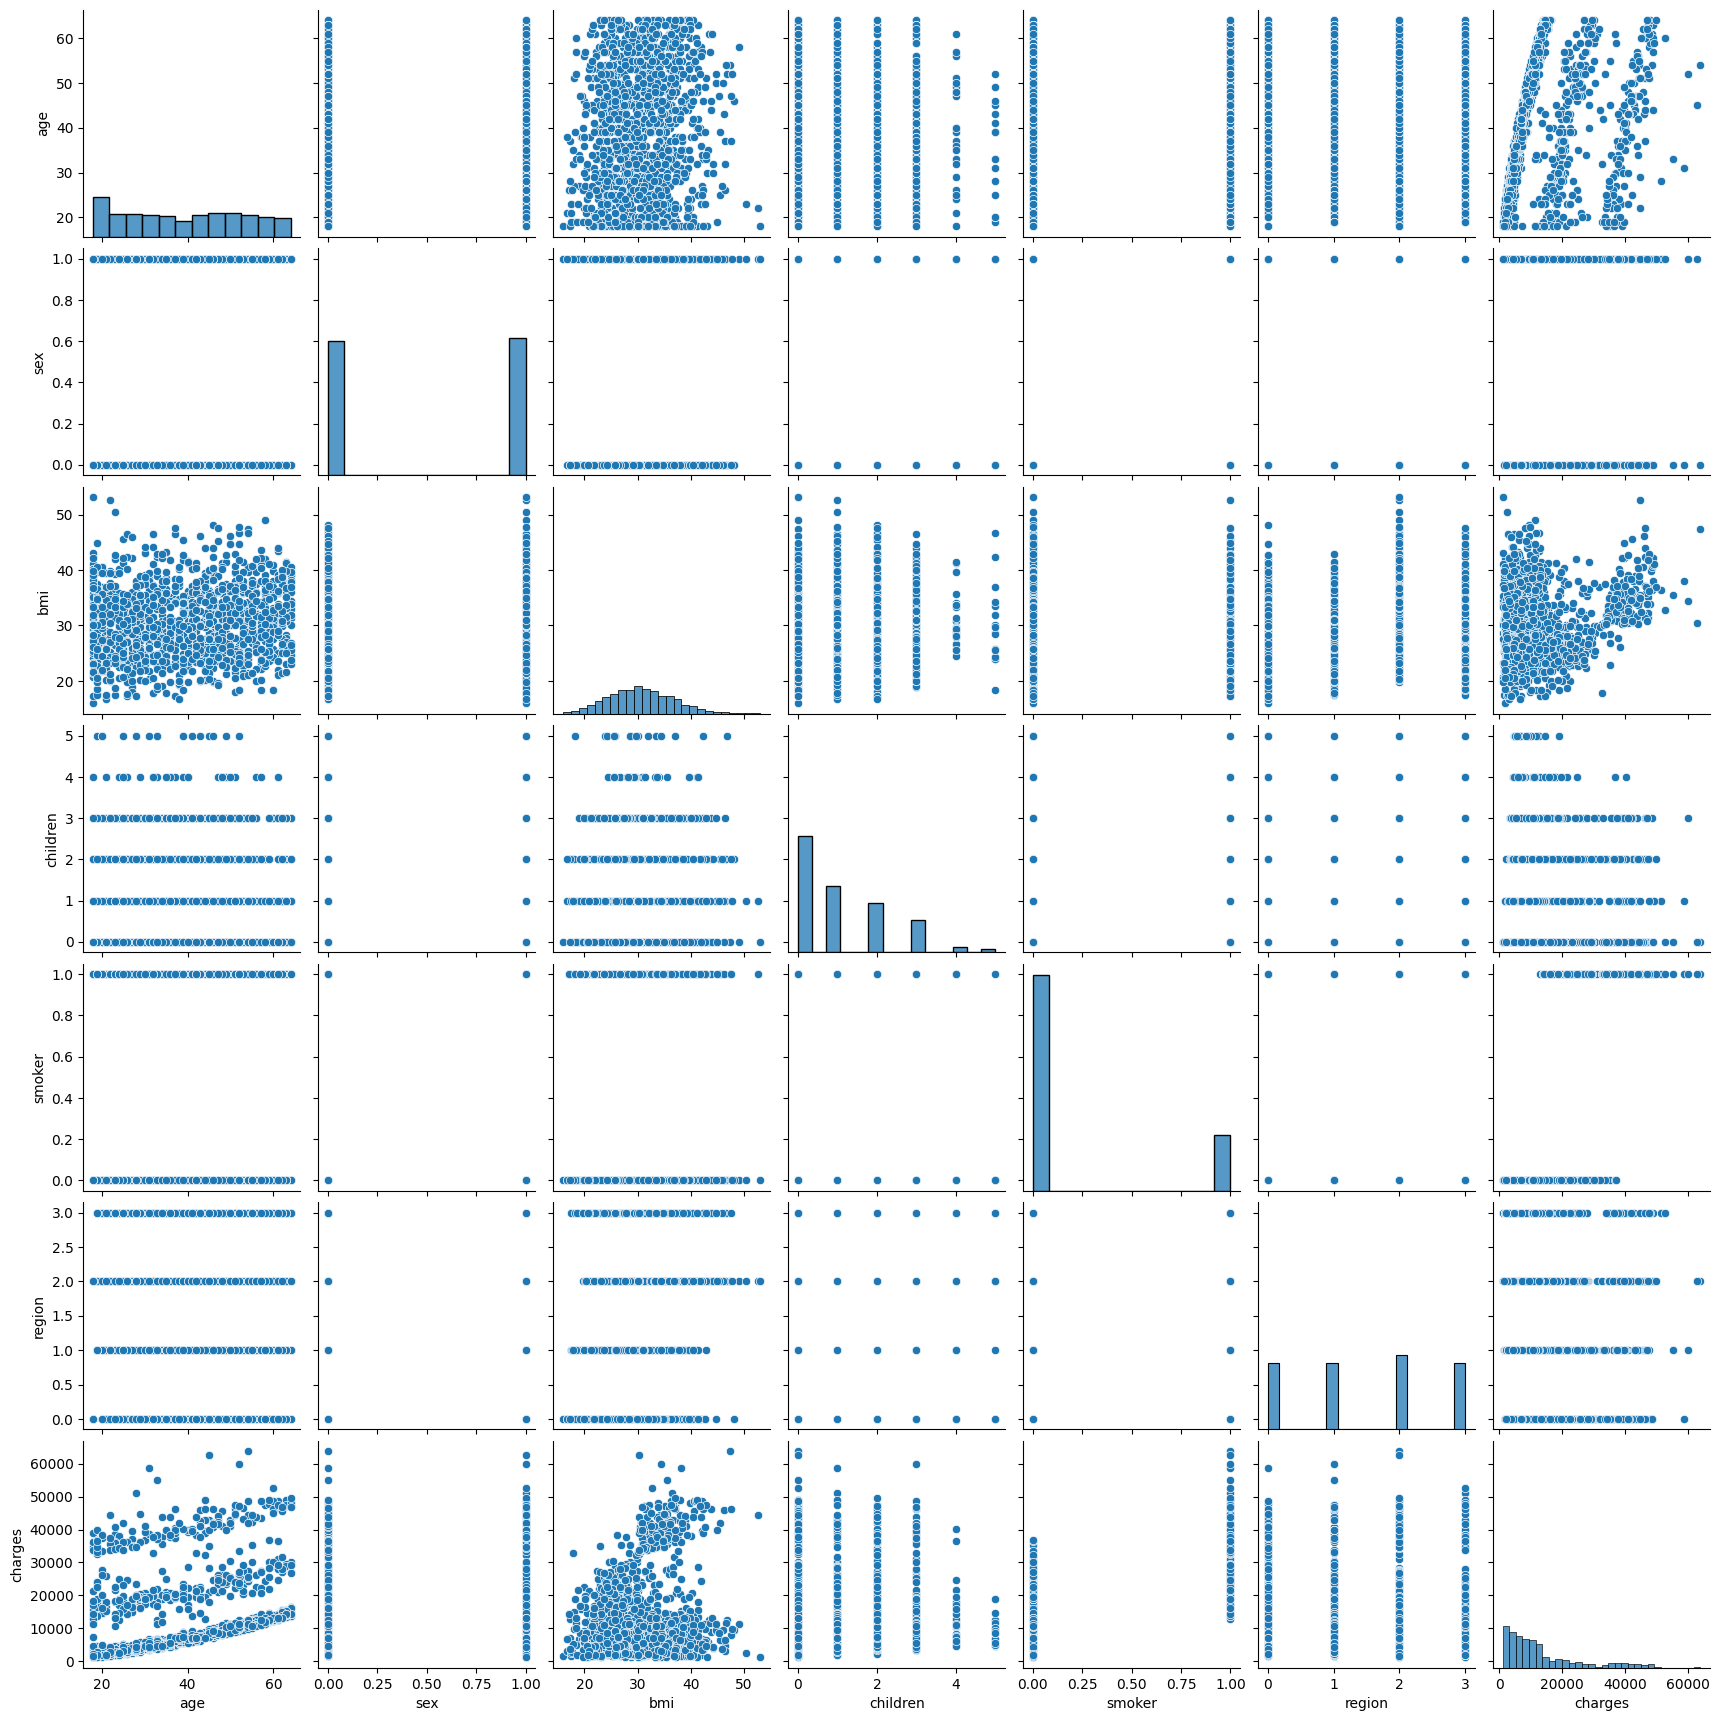

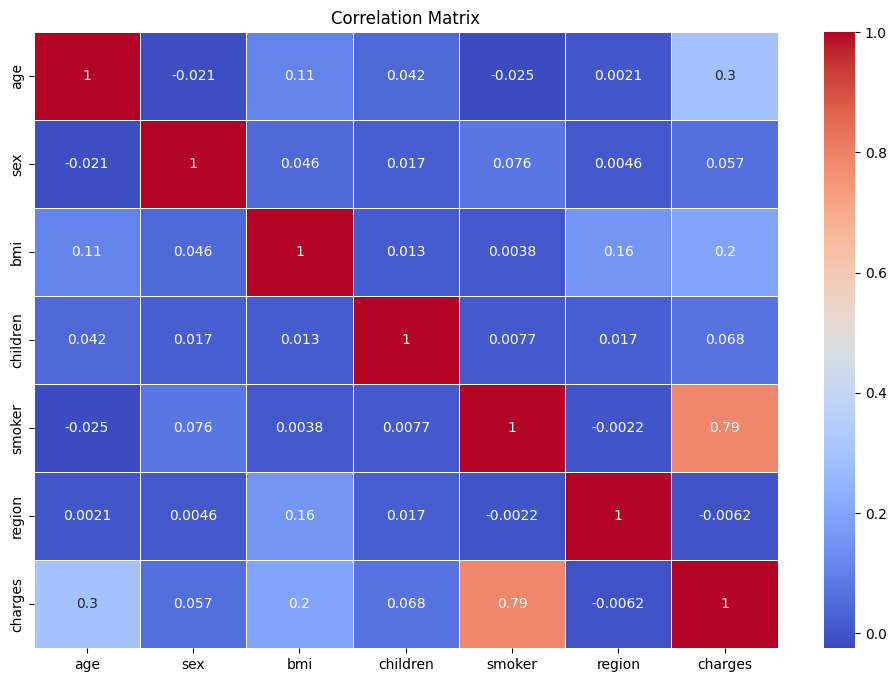

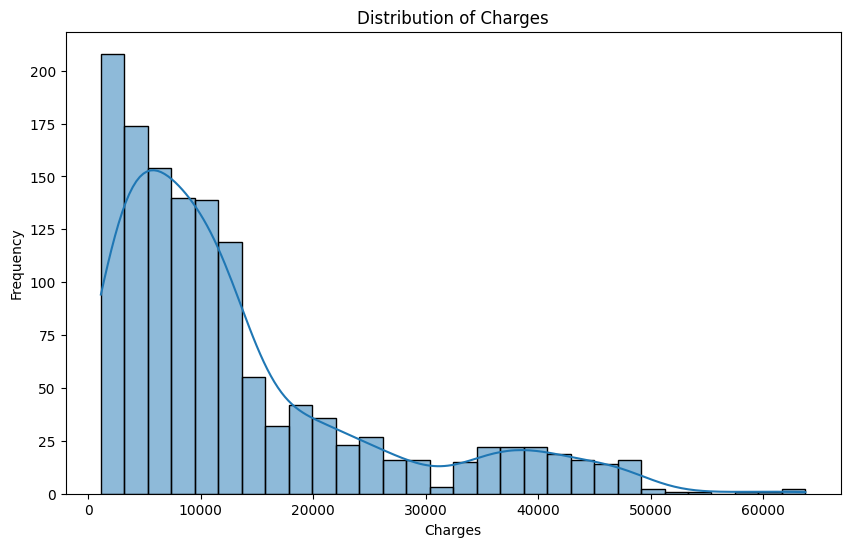

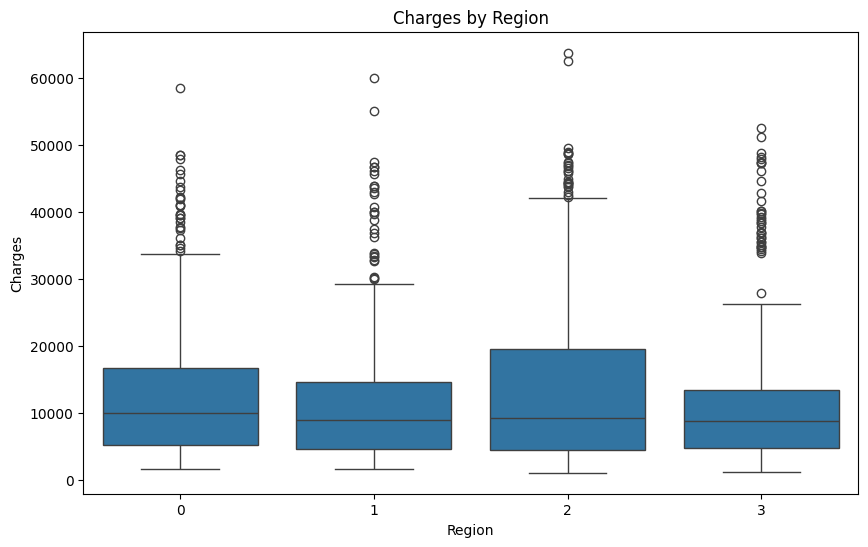

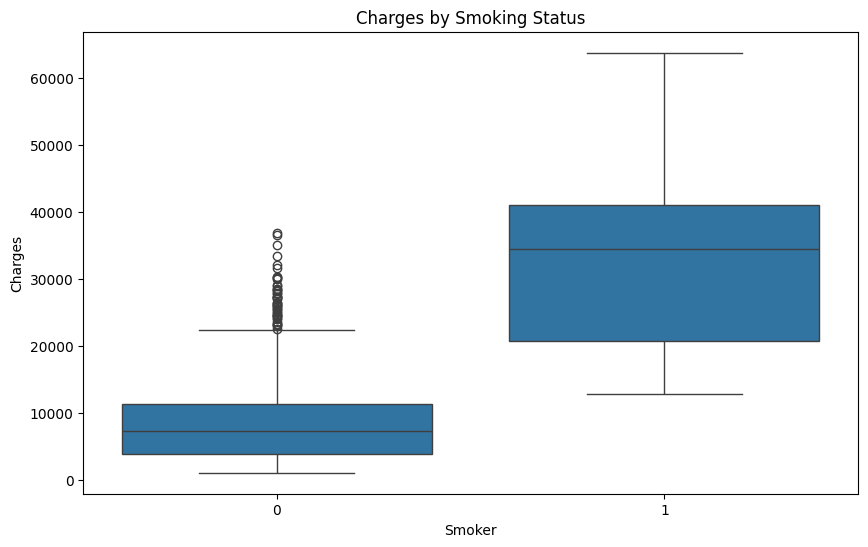

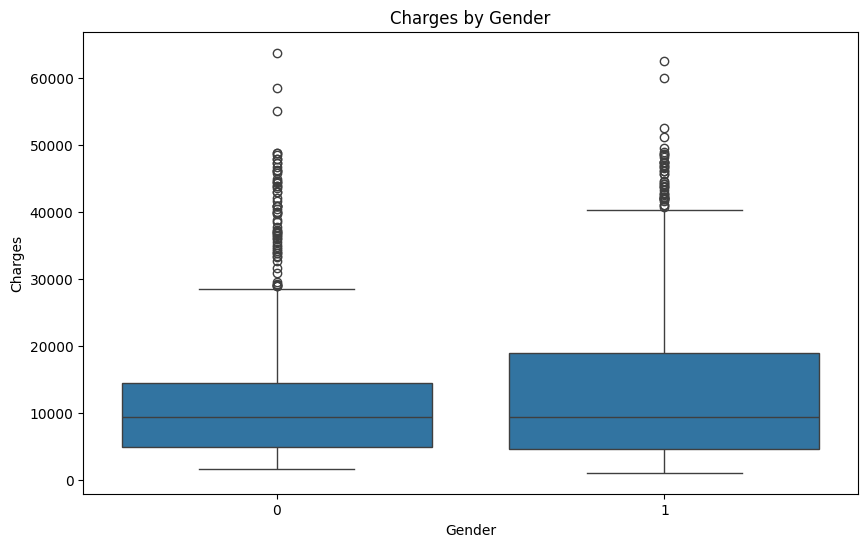

In [48]:
#EXPLORATORY DATA ANALYSIS

# Distribution of numerical features
df.hist(bins=30, figsize=(20, 15))
plt.show()

# Pairplot to see the relationships between features
sns.pairplot(df)
plt.show()

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Distribution of target variable 'charges'
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Boxplot to see the distribution of charges across different regions
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

# Boxplot to see the distribution of charges across smokers and non-smokers
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

# Boxplot to see the distribution of charges across genders
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()



In [49]:
#featutes and target variable

X = df.drop('charges', axis=1)
y = df['charges']




In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#MODEL BUILDING

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Initializing and training the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Evaluating the Decision Tree model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree Mean Squared Error: {mse_tree}')
print(f'Decision Tree R-squared: {r2_tree}')

# Initializing and training the Random Forest model
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

# Evaluating the Random Forest model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f'Random Forest Mean Squared Error: {mse_forest}')
print(f'Random Forest R-squared: {r2_forest}')

Mean Squared Error: 33635210.4311784
R-squared: 0.7833463107364539
Decision Tree Mean Squared Error: 49003243.60682007
Decision Tree R-squared: 0.6843565603663775
Random Forest Mean Squared Error: 21073365.415079337
Random Forest R-squared: 0.8642606273649586


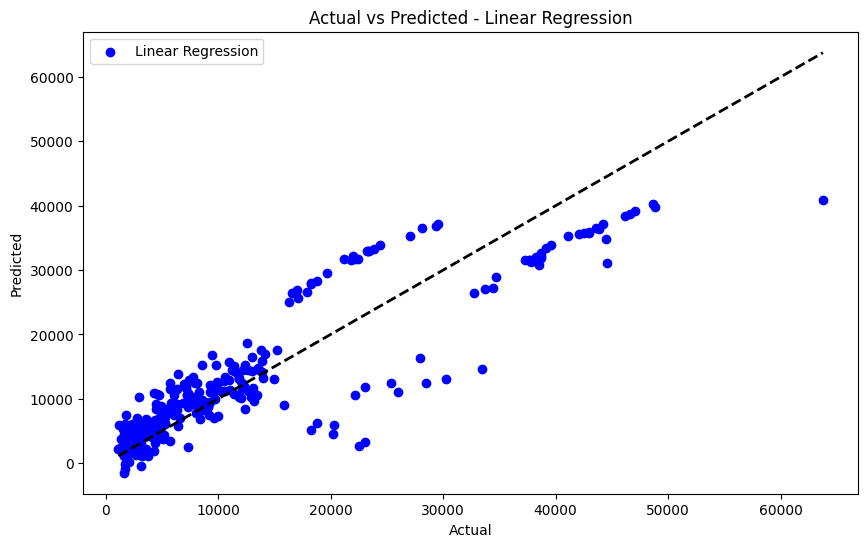

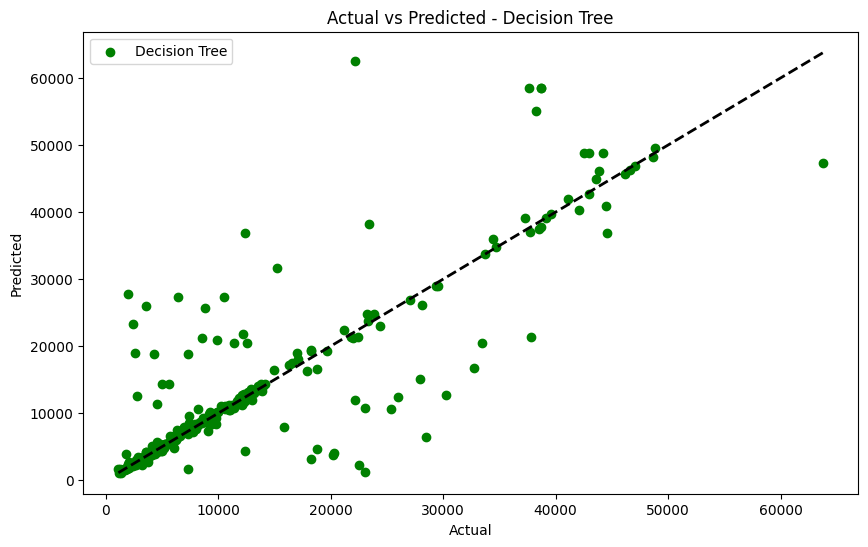

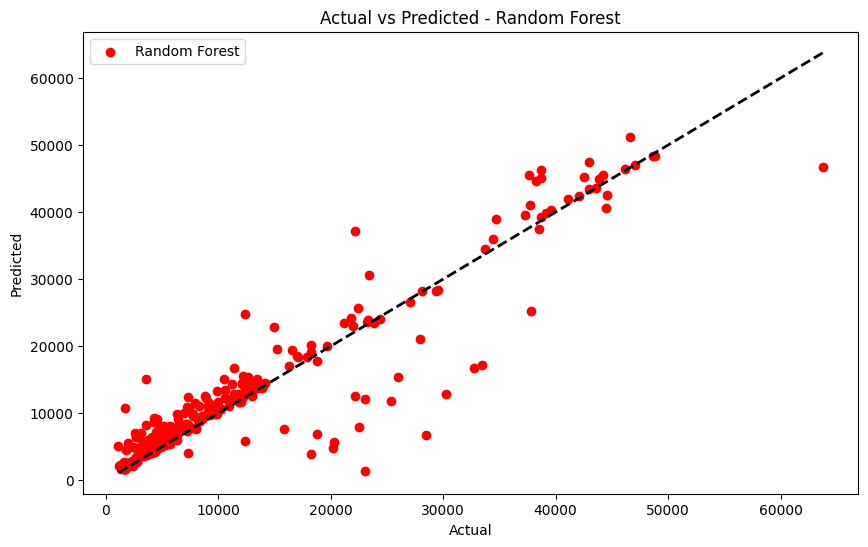

               Model           MSE  R-squared
0  Linear Regression  3.363521e+07   0.783346
1      Decision Tree  4.900324e+07   0.684357
2      Random Forest  2.107337e+07   0.864261


In [51]:
#MODEL EVALUATION

# Full Model Evaluation

# Plotting the actual vs predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Linear Regression')
plt.legend()
plt.show()

# Plotting the actual vs predicted values for Decision Tree
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, color='green', label='Decision Tree')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Decision Tree')
plt.legend()
plt.show()

# Plotting the actual vs predicted values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_forest, color='red', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Random Forest')
plt.legend()
plt.show()

# Comparing the performance of the models
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_values = [mse, mse_tree, mse_forest]
r2_values = [r2, r2_tree, r2_forest]

evaluation_df = pd.DataFrame({'Model': models, 'MSE': mse_values, 'R-squared': r2_values})
print(evaluation_df)

In [52]:
#CHOOSE THE BEST MODEL

# Choosing the best model based on R-squared value
best_model_index = r2_values.index(max(r2_values))
best_model_name = models[best_model_index]

print(f'The best model is: {best_model_name}')

The best model is: Random Forest


Feature ranking:
1. feature smoker (0.6086183615919195)
2. feature bmi (0.21629082573768055)
3. feature age (0.1345535981613959)
4. feature children (0.020199055565510583)
5. feature region (0.013925904498983942)
6. feature sex (0.006412254444509556)


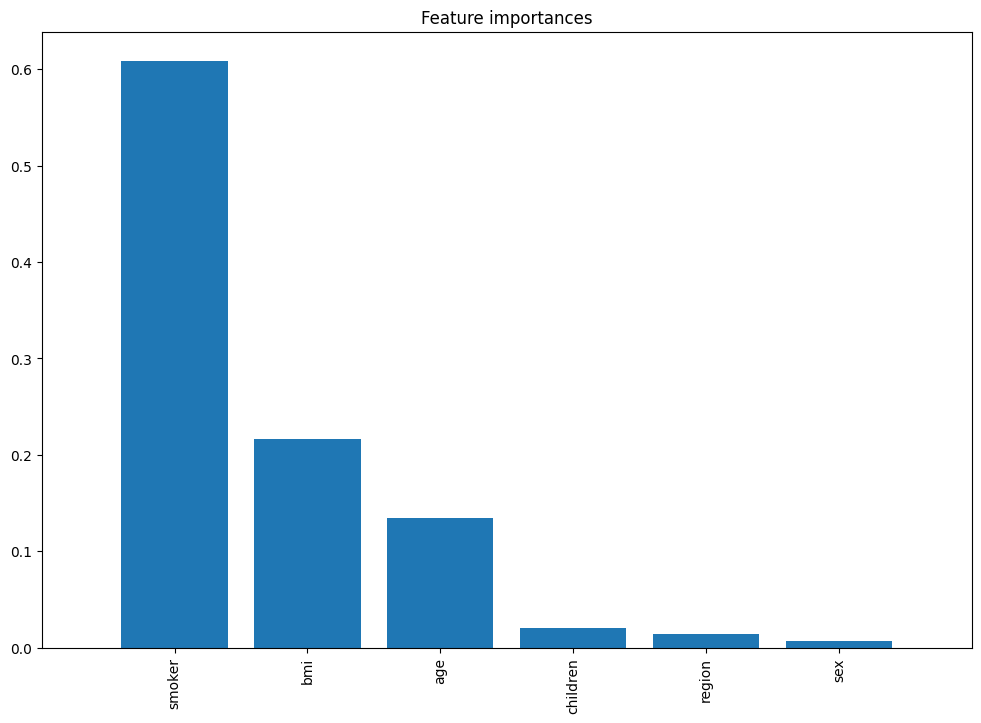

In [53]:
#feature importance analysis

# Feature importance analysis for the Random Forest model
importances = forest_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f + 1}. feature {X.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Feature ranking:
1. feature smoker (0.6086183615919195)
2. feature bmi (0.21629082573768055)
3. feature age (0.1345535981613959)
4. feature children (0.020199055565510583)
5. feature region (0.013925904498983942)
6. feature sex (0.006412254444509556)


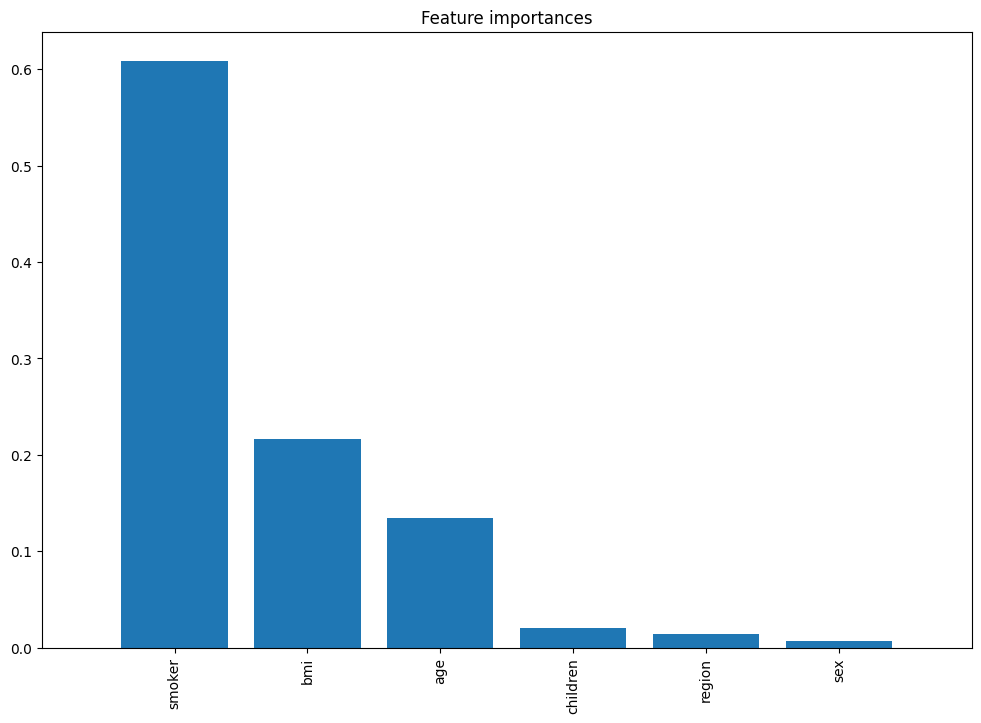

In [54]:
# Feature importance analysis for the Random Forest model
importances = forest_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f + 1}. feature {X.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

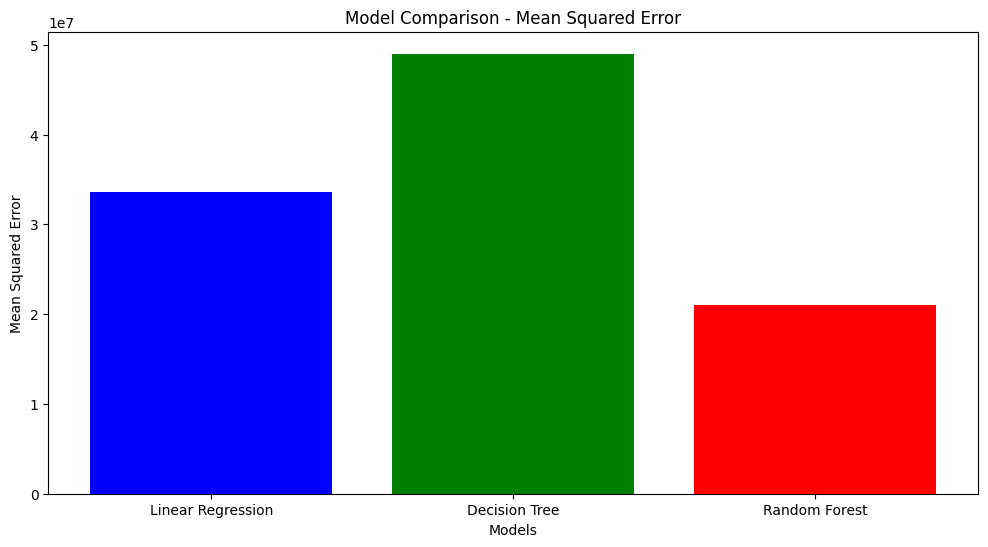

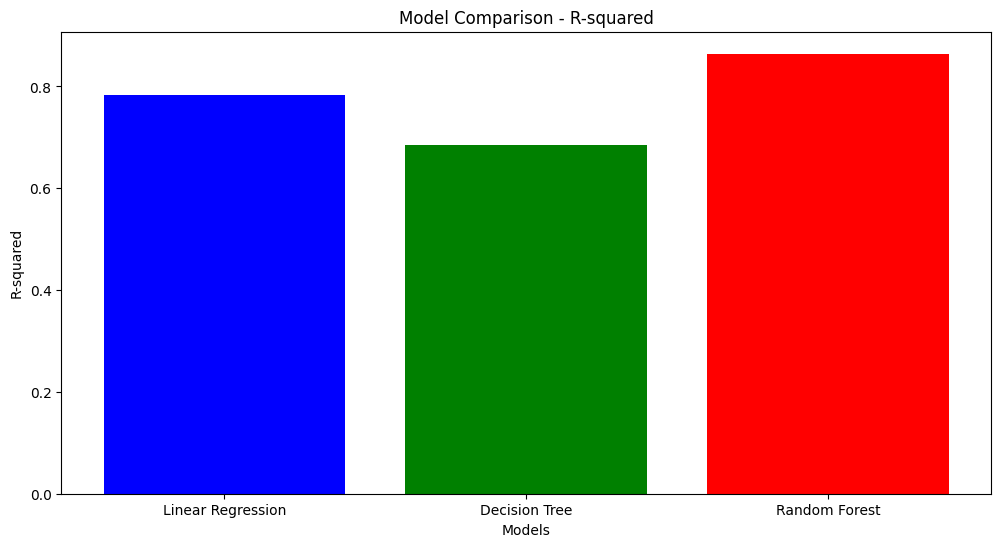

In [57]:
plt.figure(figsize=(12, 6))
plt.bar(models, mse_values, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Model Comparison - Mean Squared Error')
plt.show()

# Plotting the R-squared values for each model
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Model Comparison - R-squared')
plt.show()

In [59]:
print(f"Number of features the model was trained on: {model.n_features_in_}")
print(X_train.columns)

Number of features the model was trained on: 6
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


In [61]:
from sklearn.metrics import mean_absolute_error

# Make predictions on the test dataset
test_predictions = model.predict(X_test)

# Calculate Mean Absolute Error on the test dataset
test_mae = mean_absolute_error(y_test, test_predictions)
print(f'Mean Absolute Error on the test dataset: {test_mae}')

# Calculate R² score on the test dataset
test_r2 = r2_score(y_test, test_predictions)
print(f'R² score on the test dataset: {test_r2}')

Mean Absolute Error on the test dataset: 4186.508898366429
R² score on the test dataset: 0.7833463107364539


In [62]:
#SAVE THE BEST MODEL

import joblib

# Save the best model

joblib.dump(forest_model, 'insurance_model.pkl')



['insurance_model.pkl']